In [1]:
#!usr/bin/bash/python3

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib_venn import venn3_circles, venn3_unweighted
from matplotlib_venn import _common, _venn3

datafile = '../../data/cleanBib_citations.csv'
df = pd.read_csv(datafile)
df.head()

,paper_opencitations,code_opencitations,paper_googlescholar,code_googlescholar,title,bassett_author,arxiv,doi,preprint,paper_citation,code_citation,diversity_statement
0,0,0,1,1,Temporal sequences of brain activity at rest a...,1,0,10.1038/s42003-020-0961-x,0,1,1,1
1,0,0,1,0,Models of communication and control for brain ...,1,arXiv:2002.07029,0,1,1,1,1
2,0,0,1,1,Segregation of default mode from frontoparieta...,1,0,10.31234/osf.io/ncwef,1,0,1,1
3,1,0,1,0,Women in immunology: 2020 and beyond,0,0,10.1038/s41590-020-0618-4,0,1,0,0
4,1,0,1,0,Efficient Coding in the Economics of Human Bra...,1,arXiv:2001.05078,0,1,1,0,1


In [2]:
list(df.columns)

['paper_opencitations',
 'code_opencitations',
 'paper_googlescholar',
 'code_googlescholar',
 'title',
 'bassett_author',
 'arxiv',
 'doi',
 'preprint',
 'paper_citation',
 'code_citation',
 'diversity_statement']

In [3]:
def venn_of_df(df):
    subsets = []
    for col in df.columns:
        s = set(df.index[df[col] > 0].tolist())
        subsets.append(s)

    labels = [label.replace('_', ' ').capitalize() for label in df.columns]

    v = venn3_unweighted(subsets, set_labels=labels)
    areas = (1, 1, 1, 1, 1, 1, 1)
    centers, radii = _venn3.solve_venn3_circles(areas)
    ax = plt.gca()
    _common.prepare_venn_axes(ax, centers, radii)

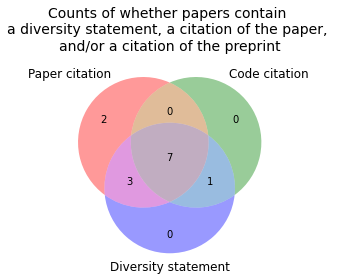

In [4]:
cols = ['paper_citation', 'code_citation', 'diversity_statement']   
venn_of_df(df[cols])
plt.title('Counts of whether papers contain \n' +\
          'a diversity statement, a citation of the paper, \n' +\
          'and/or a citation of the preprint', fontsize=14)
plt.tight_layout()
plt.savefig('../../reports/figures/venn_diagram_content.png')

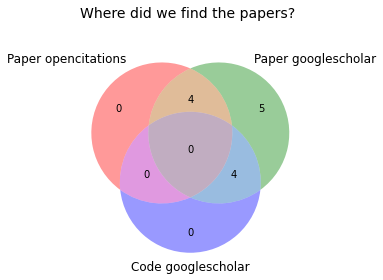

In [5]:
plt.figure()
cols = ['paper_opencitations',
 'paper_googlescholar',
 'code_googlescholar']
venn_of_df(df[cols])
plt.title('Where did we find the papers? \n', fontsize=14)
plt.tight_layout()
plt.savefig('../../reports/figures/venn_diagram_sources.png')

In [6]:
n_preprints = df['preprint'].sum()
n_articles = len(df) - df['preprint'].sum()
print(f'{n_preprints} preprints, {n_articles} journal articles')

10 preprints, 3 journal articles


In [7]:
n_by_bassett = df['bassett_author'].sum()
n_not_by_bassett = len(df) - n_by_bassett
print(f'{n_by_bassett} including Dani Bassett as an author, {n_not_by_bassett} not')

10 including Dani Bassett as an author, 3 not
